Entire house 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#JALAMOS DATASET
df = pd.read_csv('NEWYORK_SINATIPICOS1.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36322 non-null  float64
 1   listing_url                                   36322 non-null  object 
 2   scrape_id                                     36322 non-null  float64
 3   last_scraped                                  36322 non-null  object 
 4   source                                        36322 non-null  object 
 5   name                                          36322 non-null  object 
 6   description                                   36322 non-null  object 
 7   neighborhood_overview                         36322 non-null  object 
 8   picture_url                                   36322 non-null  object 
 9   host_id                                       36322 non-null 

In [5]:
# 1) Filtrar solo anuncios de tipo "Hotel room"
entire_df = df[df["room_type"] == "Entire home/apt"].copy()
print(entire_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 19435 entries, 1 to 36321
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19435 non-null  float64
 1   listing_url                                   19435 non-null  object 
 2   scrape_id                                     19435 non-null  float64
 3   last_scraped                                  19435 non-null  object 
 4   source                                        19435 non-null  object 
 5   name                                          19435 non-null  object 
 6   description                                   19435 non-null  object 
 7   neighborhood_overview                         19435 non-null  object 
 8   picture_url                                   19435 non-null  object 
 9   host_id                                       19435 non-null  floa

In [6]:
#  Asegurar que las columnas sean numéricas
entire_df["price"] = (
    entire_df["price"]
    .astype(str)
    .str.replace(",", "")
    .str.replace("$", "")
    .astype(float)
)
entire_df["host_response_rate"] = (
    entire_df["host_response_rate"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .astype(float)
)


In [7]:
num = entire_df.select_dtypes(include="number").copy()
bad = [c for c in num.columns if (num[c].count() < 2) or (num[c].nunique(dropna=True) <= 1)]
bad += [c for c in ["id","scrape_id","host_id"] if c in num.columns]

num = num.drop(columns=list(set(bad)))

In [8]:
corr = num.corr().round(2)


display(corr)  # tabla tipo DataFrame, no texto

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,price,maximum_nights,minimum_maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
host_response_rate,1.00,0.14,0.25,0.25,0.04,-0.05,0.01,-0.19,-0.19,-0.16,...,-0.00,0.01,0.00,-0.00,-0.00,-0.01,0.24,0.20,0.09,0.20
host_acceptance_rate,0.14,1.00,0.04,-0.02,-0.06,0.01,0.03,0.06,0.00,0.10,...,-0.02,-0.02,-0.02,-0.02,-0.03,-0.02,-0.01,0.07,0.02,0.06
host_listings_count,0.25,0.04,1.00,0.72,0.01,0.01,0.08,-0.10,-0.12,-0.10,...,0.04,0.05,0.05,0.05,0.04,0.04,0.78,0.24,0.21,0.06
host_total_listings_count,0.25,-0.02,0.72,1.00,0.03,-0.01,0.06,-0.10,-0.11,-0.11,...,0.00,0.01,0.01,0.00,0.01,-0.00,0.63,0.24,0.17,0.04
latitude,0.04,-0.06,0.01,0.03,1.00,0.04,-0.06,0.09,0.05,0.02,...,-0.08,-0.09,-0.08,-0.08,-0.07,-0.09,0.04,-0.06,-0.03,-0.06
longitude,-0.05,0.01,0.01,-0.01,0.04,1.00,0.10,-0.22,-0.08,-0.00,...,0.12,0.13,0.12,0.13,0.10,0.13,0.02,0.11,0.01,0.11
accommodates,0.01,0.03,0.08,0.06,-0.06,0.10,1.00,0.08,0.01,0.01,...,0.03,0.03,0.03,0.03,0.03,0.03,0.07,0.09,0.03,0.02
price,-0.19,0.06,-0.10,-0.10,0.09,-0.22,0.08,1.00,0.22,0.17,...,-0.17,-0.18,-0.18,-0.17,-0.17,-0.17,-0.08,-0.13,-0.07,-0.17
maximum_nights,-0.19,0.00,-0.12,-0.11,0.05,-0.08,0.01,0.22,1.00,0.77,...,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.11,-0.10,-0.09,-0.12
minimum_maximum_nights,-0.16,0.10,-0.10,-0.11,0.02,-0.00,0.01,0.17,0.77,1.00,...,0.01,0.01,0.01,0.01,0.01,0.01,-0.10,-0.06,-0.08,-0.06


In [9]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(corr)
Corr_Factors1

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,price,maximum_nights,minimum_maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
host_response_rate,1.00,0.14,0.25,0.25,0.04,0.05,0.01,0.19,0.19,0.16,...,0.00,0.01,0.00,0.00,0.00,0.01,0.24,0.20,0.09,0.20
host_acceptance_rate,0.14,1.00,0.04,0.02,0.06,0.01,0.03,0.06,0.00,0.10,...,0.02,0.02,0.02,0.02,0.03,0.02,0.01,0.07,0.02,0.06
host_listings_count,0.25,0.04,1.00,0.72,0.01,0.01,0.08,0.10,0.12,0.10,...,0.04,0.05,0.05,0.05,0.04,0.04,0.78,0.24,0.21,0.06
host_total_listings_count,0.25,0.02,0.72,1.00,0.03,0.01,0.06,0.10,0.11,0.11,...,0.00,0.01,0.01,0.00,0.01,0.00,0.63,0.24,0.17,0.04
latitude,0.04,0.06,0.01,0.03,1.00,0.04,0.06,0.09,0.05,0.02,...,0.08,0.09,0.08,0.08,0.07,0.09,0.04,0.06,0.03,0.06
longitude,0.05,0.01,0.01,0.01,0.04,1.00,0.10,0.22,0.08,0.00,...,0.12,0.13,0.12,0.13,0.10,0.13,0.02,0.11,0.01,0.11
accommodates,0.01,0.03,0.08,0.06,0.06,0.10,1.00,0.08,0.01,0.01,...,0.03,0.03,0.03,0.03,0.03,0.03,0.07,0.09,0.03,0.02
price,0.19,0.06,0.10,0.10,0.09,0.22,0.08,1.00,0.22,0.17,...,0.17,0.18,0.18,0.17,0.17,0.17,0.08,0.13,0.07,0.17
maximum_nights,0.19,0.00,0.12,0.11,0.05,0.08,0.01,0.22,1.00,0.77,...,0.05,0.05,0.05,0.05,0.05,0.05,0.11,0.10,0.09,0.12
minimum_maximum_nights,0.16,0.10,0.10,0.11,0.02,0.00,0.01,0.17,0.77,1.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.10,0.06,0.08,0.06


In [10]:
entire_df[["availability_365", "number_of_reviews"]].corr()

,availability_365,number_of_reviews
availability_365,1.000000,-0.027006
number_of_reviews,-0.027006,1.000000


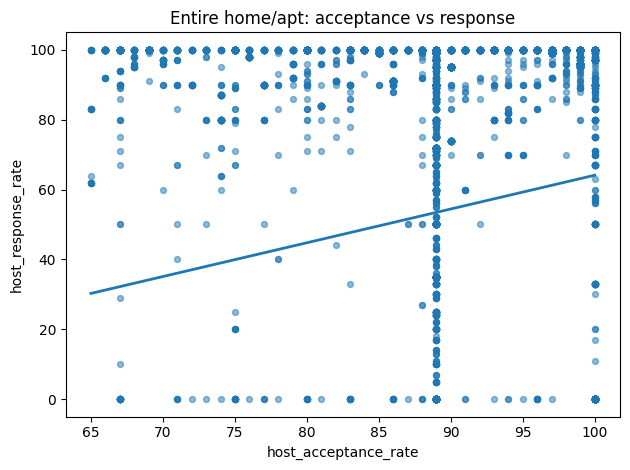

In [11]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

d = entire_df.copy()
rt = 'room_type' if 'room_type' in d.columns else 'room type'
for c in ['host_acceptance_rate','host_response_rate']:
    d[c] = pd.to_numeric(d[c].astype(str).str.replace('%',''), errors='coerce')

entire = d.loc[d[rt].astype(str).str.lower().eq('entire home/apt'),
               ['host_acceptance_rate','host_response_rate']].dropna()

sns.regplot(x='host_acceptance_rate', y='host_response_rate', data=entire,
            scatter_kws={'s':18, 'alpha':.5}, line_kws={'linewidth':2}, ci=None)
plt.title('Entire home/apt: acceptance vs response')
plt.xlabel('host_acceptance_rate'); plt.ylabel('host_response_rate')
plt.tight_layout(); plt.show()